# setup and data cleaning

In [2]:
#setup
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from matplotlib.font_manager import FontProperties
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

LE = preprocessing.LabelEncoder()
df = pd.read_csv('ga_county_covid.csv')

df = df.drop(columns=['Unnamed: 0','fips code','date','fips','cases','deaths','FIPS','state','county','transit_scores - population weighted averages aggregated from town/city level to county'])

#removing irrelevant columns

In [3]:

#code 2013 NCHS scheme: transportation
df['2013 NCHS scheme']= df['2013 NCHS scheme'].astype('category') #string to category
#df.to_csv('ga_county_covid.csv')
le = preprocessing.LabelEncoder()
le.fit(df['2013 NCHS scheme'])
df['2013 NCHS scheme'] = le.transform(df['2013 NCHS scheme'])  

In [4]:


df_cases = df.drop(columns=['High_risk_by_deaths'])
df_deaths = df.drop(columns=['High_risk_by_cases'])

df_cases.columns

Index(['Jan Temp AVG / F', 'Feb Temp AVG / F', 'Mar Temp AVG / F',
       'Apr Temp AVG / F', 'May Temp AVG / F', 'Jun Temp AVG / F',
       'Jul Temp AVG / F', 'Aug Temp AVG / F', 'Sep Temp AVG / F',
       'Oct Temp AVG / F', 'Nov Temp AVG / F', 'Dec Temp AVG / F',
       'Density per square mile of land area - Population', 'Total_age0to17',
       'Total_age85plusr', 'Total_age65plus', 'Total_age18to64',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'Less than a high school diploma 2014-18', 'Unemployment_rate_2018',
       'Median_Household_Income_2018',
       'Active Physicians per 100000 Population 2018 (AAMC)',
       'MD and DO Student Enrollment per 100000 Population AY 2018-2019 (AAMC)',
       'Total nurse practitioners (2019)', 'ICU Beds', '2013 NCHS scheme',
       'High_risk_by_cases'],
      dtype='object')

# Predicting risk (cases)

In [5]:
#train test split
train, test = train_test_split(df_cases,test_size=0.2,shuffle=True,random_state=12345678)

#Reshape data because of the warning"Expected 2D array, got 1D array instead"

X_train = train.iloc[:, 0:26]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, 0:26]#to_numpy().reshape(-1,1)
y_test = test.iloc[:, -1]

#X_train.dtypes

### Logistic, Ridge, Lasso, Decision Tree, Random Forest, EN

In [6]:
ll_clf = LogisticRegression(random_state=12345678).fit(X_train, y_train)

y_pred = ll_clf.predict(X_test)

print('MSE for logistic regression: '+ str(1-mean_squared_error(y_test, y_pred)))

ridge_clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
y_pred = ridge_clf.predict(X_test)
print('MSE for Ridge: '+ str(1-mean_squared_error(y_test, y_pred)))


lasso_clf = LassoCV(cv=5, random_state=12345678).fit(X_train, y_train)

y_pred = lasso_clf.predict(X_test)
print('MSE for Lasso: '+ str(1-mean_squared_error(y_test, y_pred)))


cart_clf = DecisionTreeClassifier(max_depth=100, random_state=12345678).fit(X_train, y_train)
y_pred = cart_clf.predict(X_test)
print('MSE for Decision Tree: '+ str(1-mean_squared_error(y_test, y_pred)))

rf_clf = RandomForestClassifier(max_depth=100,random_state=12345678).fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('MSE for Random Forest: '+ str(1-mean_squared_error(y_test, y_pred)))


en_clf = ElasticNet(random_state=12345678).fit(X_train, y_train)
y_pred = en_clf.predict(X_test)
print('MSE for Elastic Net: '+ str(1-mean_squared_error(y_test, y_pred)))

#gmm
gmm=GaussianMixture(n_components=2,reg_covar=1e-4)
gmm.fit(X_train, y_train)
y_pred = gmm.predict(X_test)

print('MSE for GMM: '+ str(1-mean_squared_error(y_test, y_pred)))

#knn

knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('MSE for knn: '+ str(1-mean_squared_error(y_test, y_pred)))


#N bayes
bayes=GaussianNB()
bayes.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('MSE for Naive Bayes: '+ str(1-mean_squared_error(y_test, y_pred)))

#Kmeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_train, y_train)
y_pred = kmeans.predict(X_test)
print('MSE for K-Means: '+ str(1-mean_squared_error(y_test, y_pred)))






# Train the model with SVM
svm = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight ='balanced'))
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('SVM Classification accuracy:'+ str(1-mean_squared_error(y_test, y_pred)))

# Train the model with Neural Network: 5 steps
mlp = MLPClassifier(hidden_layer_sizes=(100,20), max_iter=5000,activation = 'relu',solver='adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('MSE for Neural Network '+str(1-mean_squared_error(y_test, y_pred)))

/Users/summerxue/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MSE for logistic regression: 0.78125
MSE for Ridge: 0.7842010454830215
MSE for Lasso: 0.7869761819505785
MSE for Decision Tree: 0.8125
MSE for Random Forest: 0.78125
MSE for Elastic Net: 0.7929494472463438


/Users/summerxue/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3640283319937776, tolerance: 0.0031732283464566934
  positive)


MSE for GMM: 0.46875
MSE for knn: 0.75
MSE for Naive Bayes: 0.75
MSE for K-Means: 0.5
SVM Classification accuracy:0.78125
MSE for Neural Network 0.84375


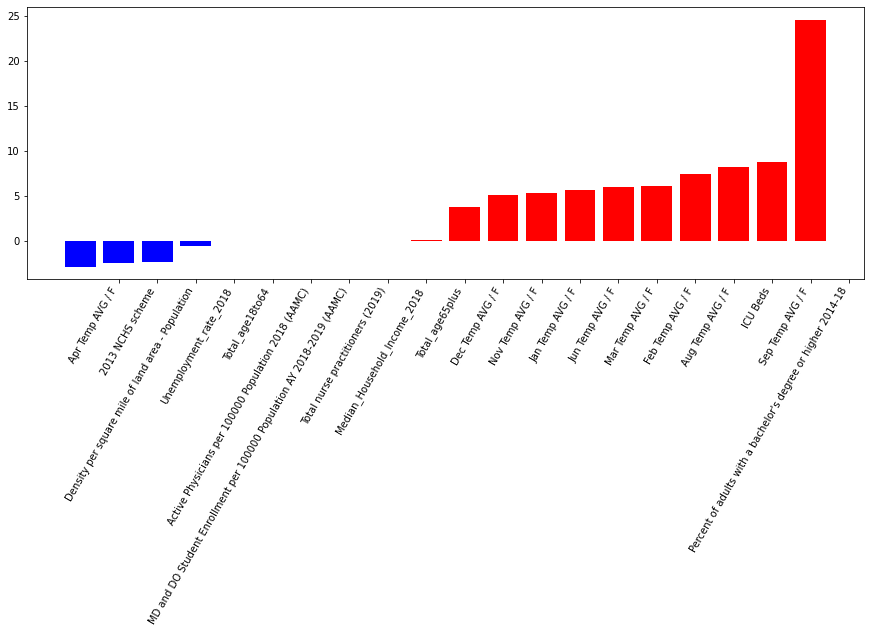

In [7]:
#plot top features from SVM classifier 
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['blue' if c < 0 else 'red' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
plot_coefficients(svm, df_cases.columns.to_list())



In [8]:
rf_clf = RandomForestClassifier(max_depth=100,random_state=12345678).fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('MSE for Random Forest: '+ str(1-mean_squared_error(y_test, y_pred)))
np.argsort(rf_clf.feature_importances_)


MSE for Random Forest: 0.78125


array([22, 21, 25,  4, 19,  1,  9,  7, 11,  5,  3,  6,  8,  2, 20,  0, 10,
       17, 12, 18, 24, 15, 14, 23, 16, 13])

In [9]:
df_deaths.columns[[17,20, 23, 18, 16,13, 15, 12, 24, 14]]

Index(['Percent of adults with a bachelor's degree or higher 2014-18',
       'Median_Household_Income_2018', 'Total nurse practitioners (2019)',
       'Less than a high school diploma 2014-18', 'Total_age18to64',
       'Total_age0to17', 'Total_age65plus',
       'Density per square mile of land area - Population', 'ICU Beds',
       'Total_age85plusr'],
      dtype='object')

# Predicting risk (deaths)

In [10]:
#train test split
train, test = train_test_split(df_deaths,test_size=0.2,shuffle=True,random_state=12345678)

#Reshape data because of the warning"Expected 2D array, got 1D array instead"

X_train = train.iloc[:, 0:26]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, 0:26]#to_numpy().reshape(-1,1)
y_test = test.iloc[:, -1]

#X_train.dtypes

ll_clf = LogisticRegression(random_state=12345678).fit(X_train, y_train)

y_pred = ll_clf.predict(X_test)

print('MSE for logistic regression: '+ str(1-mean_squared_error(y_test, y_pred)))

ridge_clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
y_pred = ridge_clf.predict(X_test)
print('MSE for Ridge: '+ str(1-mean_squared_error(y_test, y_pred)))


lasso_clf = LassoCV(cv=5, random_state=12345678).fit(X_train, y_train)

y_pred = lasso_clf.predict(X_test)
print('MSE for Lasso: '+ str(1-mean_squared_error(y_test, y_pred)))


cart_clf = DecisionTreeClassifier(max_depth=100, random_state=12345678).fit(X_train, y_train)
y_pred = cart_clf.predict(X_test)
print('MSE for Decision Tree: '+ str(1-mean_squared_error(y_test, y_pred)))

rf_clf = RandomForestClassifier(max_depth=100,random_state=12345678).fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('MSE for Random Forest: '+ str(1-mean_squared_error(y_test, y_pred)))


en_clf = ElasticNet(random_state=12345678).fit(X_train, y_train)
y_pred = en_clf.predict(X_test)
print('MSE for Elastic Net: '+ str(1-mean_squared_error(y_test, y_pred)))

#gmm
gmm=GaussianMixture(n_components=2,reg_covar=1e-4,random_state=12345678)
gmm.fit(X_train, y_train)
y_pred = gmm.predict(X_test)

print('MSE for GMM: '+ str(1-mean_squared_error(y_test, y_pred)))


#knn

knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('MSE for knn: '+ str(1-mean_squared_error(y_test, y_pred)))


#N bayes
bayes=GaussianNB()
bayes.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('MSE for Naive Bayes: '+ str(1-mean_squared_error(y_test, y_pred)))

#Kmeans
kmeans=KMeans(n_clusters=2,random_state=12345678)
kmeans.fit(X_train, y_train)
y_pred = kmeans.predict(X_test)
print('MSE for K-Means: '+ str(1-mean_squared_error(y_test, y_pred)))




# Train the model with SVM
svm = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight ='balanced'))
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('SVM Classification accuracy:'+ str(1-mean_squared_error(y_test, y_pred)))

# Train the model with Neural Network: 5 steps
mlp = MLPClassifier(hidden_layer_sizes=(100,20), max_iter=5000,activation = 'relu',solver='adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('MSE for Neural Network '+str(1-mean_squared_error(y_test, y_pred)))



MSE for logistic regression: 0.6875
MSE for Ridge: 0.8001845928253501
MSE for Lasso: 0.7749799355115764
MSE for Decision Tree: 0.625


/Users/summerxue/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MSE for Random Forest: 0.65625
MSE for Elastic Net: 0.7793521389625323
MSE for GMM: 0.46875
MSE for knn: 0.6875
MSE for Naive Bayes: 0.6875
MSE for K-Means: 0.5


/Users/summerxue/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.252214152745477, tolerance: 0.003159055118110236
  positive)


SVM Classification accuracy:0.65625
MSE for Neural Network 0.71875


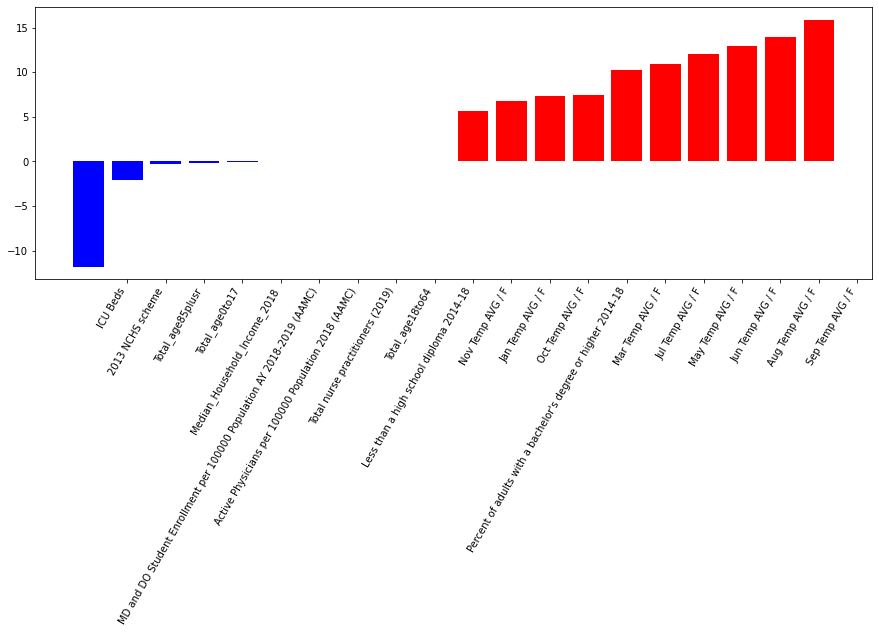

In [11]:
plot_coefficients(svm, df_cases.columns.to_list())
